In [32]:
# source: https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

%matplotlib notebook
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

def normalizeArray(arrayIn):
    arrayOut = []
    for i in range(0,len(array)):
        arrayOut.append([])
        totalRow = sum(arrayIn[i])
        for j in range(0,len(arrayIn[i])): arrayOut[i].append(round(100*arrayIn[i][j]/totalRow))
    return(arrayOut)
            
def cm(array,columnNames):
    arrayNorm = normalizeArray(array)
    df_cm = pd.DataFrame(arrayNorm, index = columnNames, columns = columnNames)
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True,cmap="Blues")

<IPython.core.display.Javascript object>


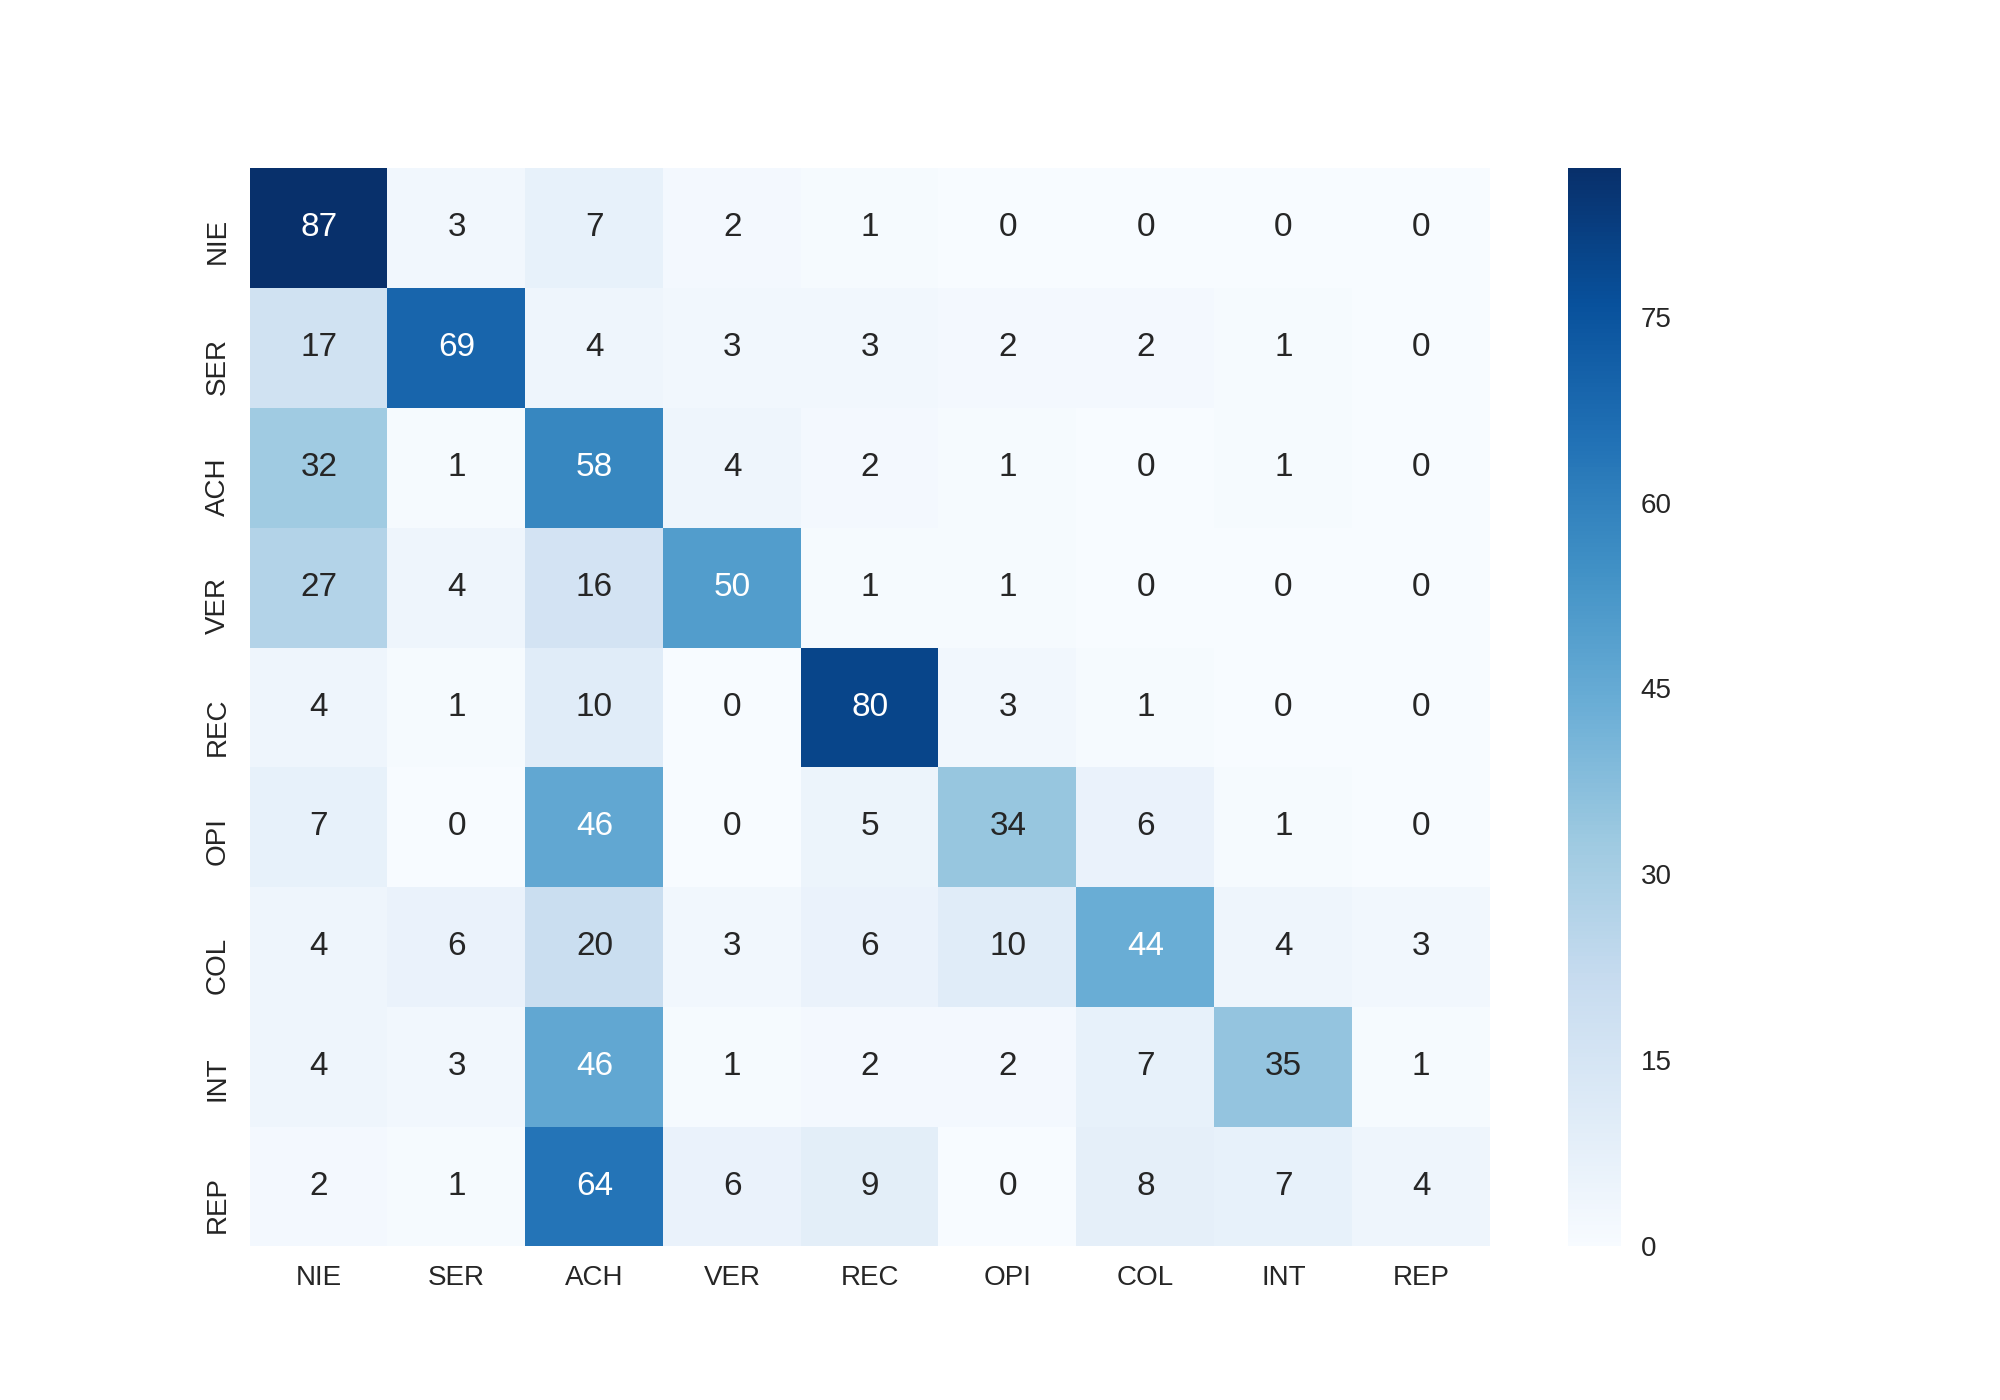

In [4]:
columnNames = ["NIE","SER","ACH","VER","REC","OPI","COL","INT","REP"]
array = [[3213,  104,  263,   69,   25,   12,    2,    9,    0 ],
          [322, 1327,   76,   51,   54,   32,   34,   12,    6 ],
          [412,   14,  745,   49,   21,   16,    6,   16,    2 ],
          [128,   20,   79,  243,    5,    5,    1,    1,    0 ],
           [12,    4,   32,    1,  246,    9,    2,    1,    0 ],
           [16,    1,   99,    0,   10,   74,   12,    3,    0 ],
            [7,   11,   36,    5,   11,   19,   81,    8,    6 ],
            [5,    4,   61,    1,    2,    3,    9,   47,    1 ],
            [2,    1,   75,    7,   11,    0,    9,    8,    5 ]]
cm(array,columnNames)

In [2]:
def swapRows(arrayIn,col1,col2):
    arrayOut = []
    for col in range(0,len(arrayIn)):
        if col == col1: arrayOut.append(arrayIn[col2])
        elif col == col2: arrayOut.append(arrayIn[col1])
        else: arrayOut.append(arrayIn[col])
    return(arrayOut)

def swapColumns(arrayIn,col1,col2):
    arrayOut = []
    for col in range(0,len(arrayIn)):
        row = list(arrayIn[col])
        row[col1],row[col2] = row[col2],row[col1]
        arrayOut.append(row)
    return(arrayOut)

def swapRowsColumns(arrayIn,columnNamesIn,col1,col2):
    arrayTmp = swapRows(arrayIn,col1,col2)
    arrayOut = swapColumns(arrayTmp,col1,col2)
    columnNamesOut = swapRows(columnNamesIn,col1,col2)
    return(arrayOut,columnNamesOut)

def swapData(array,columnNames):
    array1,columnNames1 = swapRowsColumns(array,columnNames,1,7)   # SER <=> INT
    array2,columnNames2 = swapRowsColumns(array1,columnNames1,2,8) # ACH <=> REP
    array3,columnNames3 = swapRowsColumns(array2,columnNames2,4,6) # REC <=> COL
    array4,columnNames4 = swapRowsColumns(array3,columnNames3,5,8) # OPI <=> ACH
    array5,columnNames5 = swapRowsColumns(array4,columnNames4,6,8) # REC <=> OPI
    array6,columnNames6 = swapRowsColumns(array5,columnNames5,7,8) # SER <=> REC
    return(array6,columnNames6)

<IPython.core.display.Javascript object>


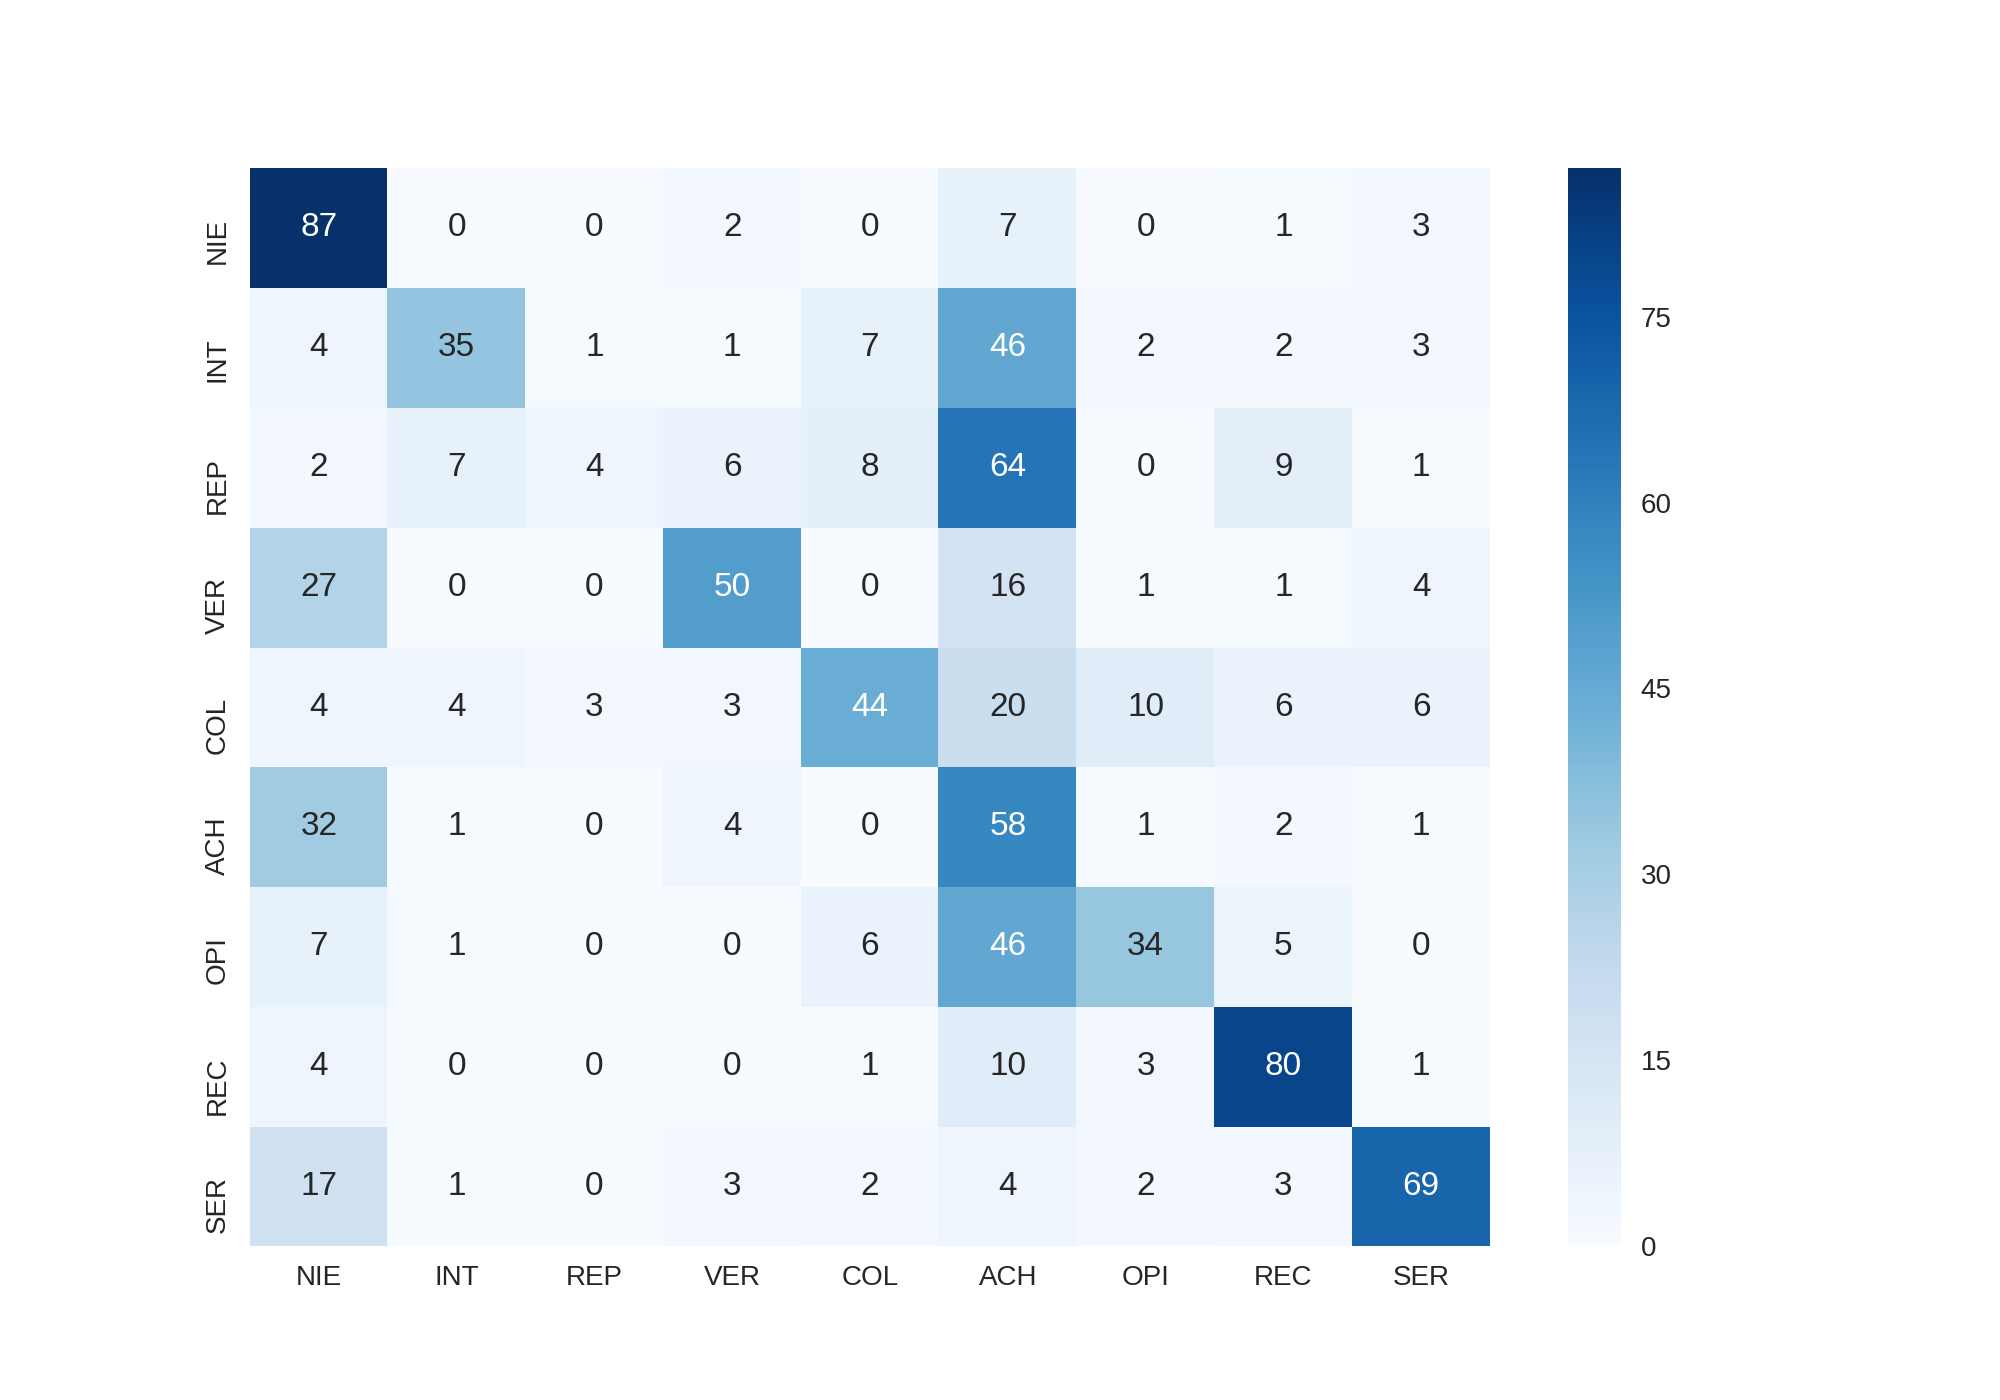

In [6]:
arraySwapped,columnNamesSwapped = swapData(array,columnNames)
cm(arraySwapped,columnNamesSwapped)

<IPython.core.display.Javascript object>


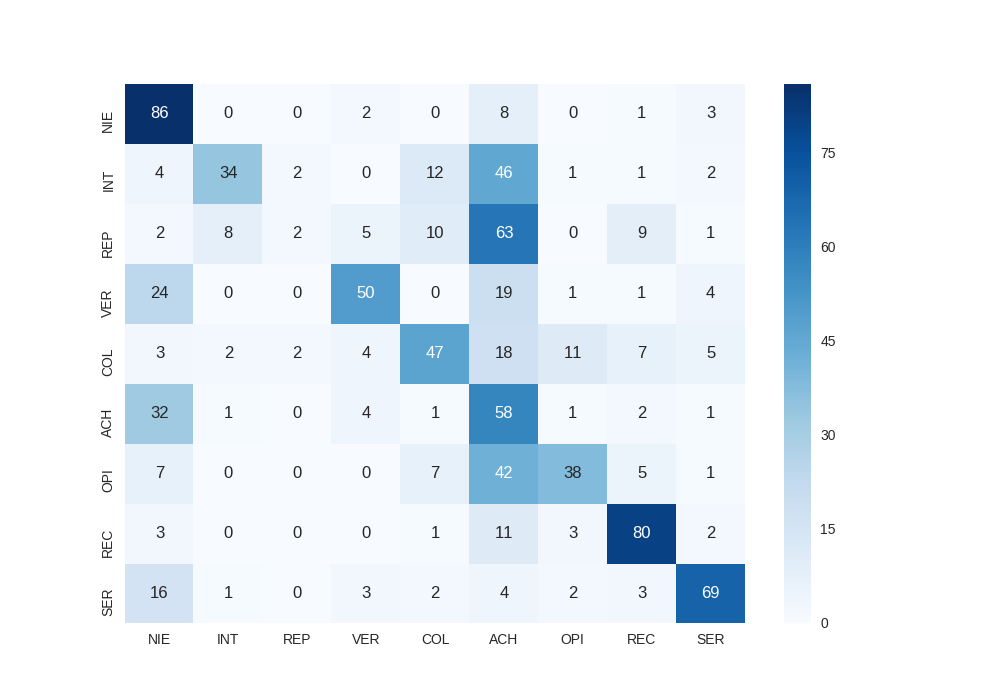

In [5]:
columnNames = ["NIE","SER","ACH","VER","REC","OPI","COL","INT","REP"]
array = [[3186,  107,  278,   72,   29,   11,    2,   12,    0],
          [314, 1314,   79,   53,   53,   35,   44,   13,    9],
          [411,   14,  745,   50,   20,   13,    7,   19,    2],
          [118,   18,   92,  240,    5,    5,    2,    1,    1],
            [8,    6,   34,    1,  246,    8,    3,    1,    0],
           [15,    2,   90,    1,   10,   81,   15,    1,    0],
            [5,   10,   34,    8,   12,   20,   87,    4,    4],
            [5,    2,   61,    0,    1,    1,   16,   45,    2],
            [2,    1,   74,    6,   11,    0,   12,   10,    2]]
arraySwapped,columnNamesSwapped = swapData(array,columnNames)
cm(arraySwapped,columnNamesSwapped)

<IPython.core.display.Javascript object>


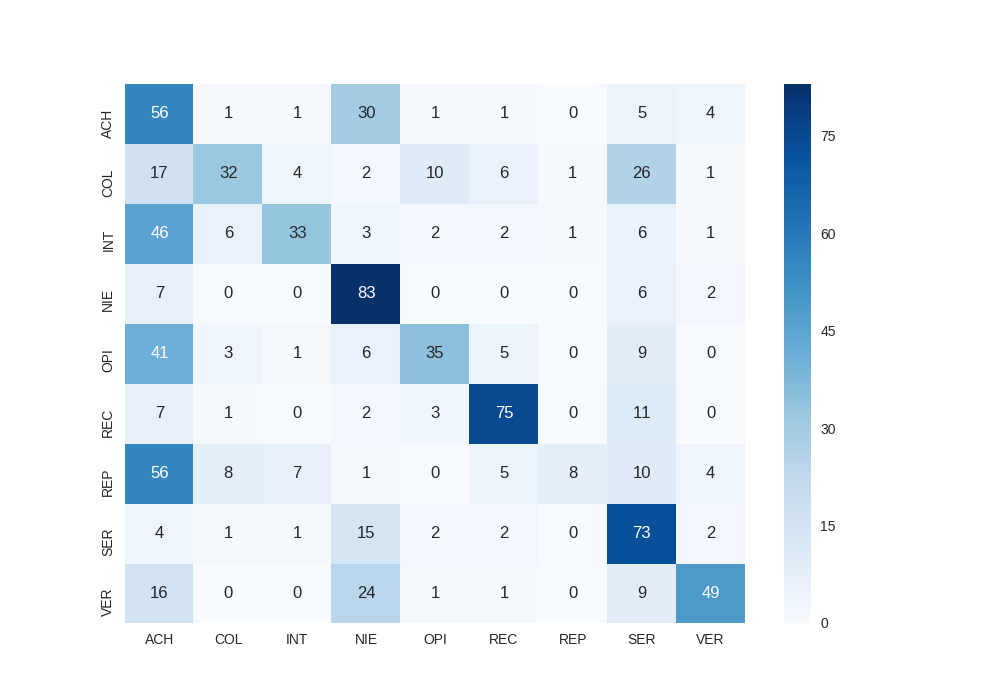

In [3]:
columnNames = ["ACH","COL","INT","NIE","OPI","REC","REP","SER","VER"]
array = [[796,   8,  17,  425,  21,  20,   1,   68,  54],
          [38,  72,   9,    5,  22,  13,   3,   58,   3],
          [78,  11,  56,    5,   3,   4,   1,   11,   1],
         [301,   2,   6, 3375,  11,  18,   1,  257,  71],
         [101,   8,   2,   15,  87,  12,   0,   22,   0],
          [28,   3,   0,    8,  10, 286,   1,   43,   1],
          [77,  11,  10,    2,   0,   7,  11,   14,   5],
          [82,  27,  12,  318,  32,  43,   3, 1563,  47],
          [84,   1,   0,  121,   3,   4,   0,   47, 250]]
arraySwapped,columnNamesSwapped = swapData(array,columnNames)
cm(array,columnNames)

In [7]:
def computeRowTotals(array):
    rowTotals = []
    for i in range(0,len(array)): rowTotals.append(sum(array[i]))
    return(rowTotals)

def computeColumnTotals(array):
    columnTotals = []
    if len(array) > 0: 
        for i in range(0,len(array[0])): columnTotals.append(sum([x[i] for x in array]))
    return(columnTotals)
    
print(computeRowTotals(array))
print(computeColumnTotals(array))

[1410, 223, 170, 4042, 247, 380, 137, 2127, 510]
[1585, 143, 112, 4274, 189, 407, 21, 2083, 432]


In [13]:
def reEstimate(scoreList,confusionMatrix):
    reEstimatedScoreList = []
    columnTotals = computeColumnTotals(confusionMatrix) 
    for i in range(0,len(scoreList)):
        total = 0.0
        for column in range(0,len(scoreList)):
            total += scoreList[column]*confusionMatrix[i][column]/columnTotals[column]
        reEstimatedScoreList.append(total)
    return(reEstimatedScoreList)

print(reEstimate(computeColumnTotals(array),array))

[1410.0, 223.0, 170.0, 4042.0, 247.0, 380.0, 137.0, 2127.0, 510.0]


<IPython.core.display.Javascript object>


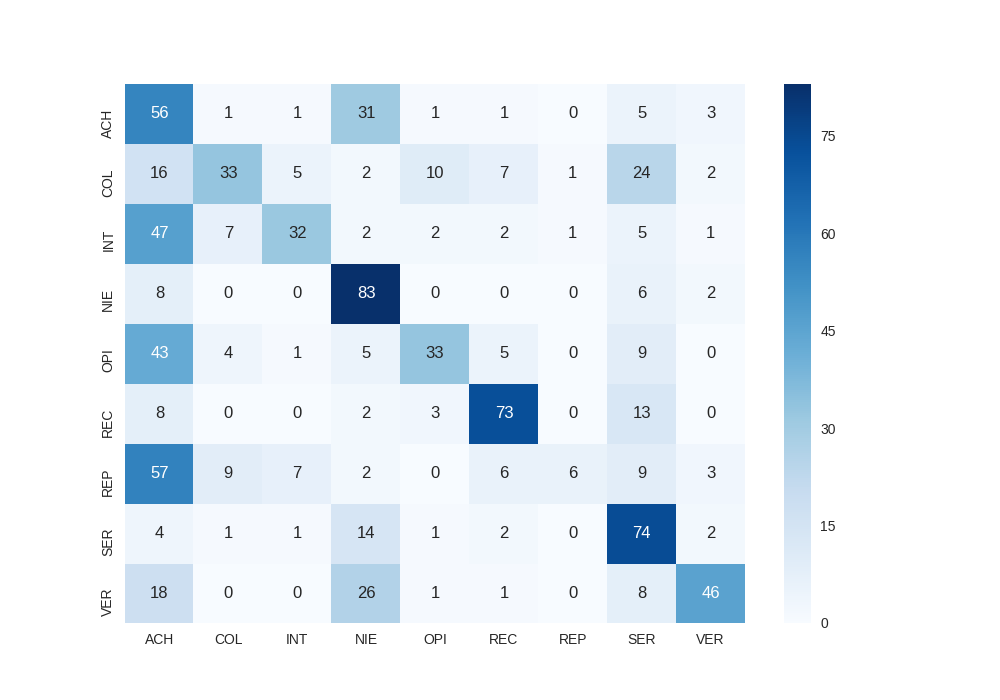

In [14]:
# first section with -w
columnNames = ["ACH","COL","INT","NIE","OPI","REC","REP","SER","VER"]
array = [[  773,   10,   17,  433,   15,   15,    2,   63,   47],
 [   34,   71,   10,    5,   21,   14,    2,   51,    4],
 [   77,   12,   53,    4,    3,    4,    1,    9,    1],
 [  294,    2,    6, 3091,    8,   18,    0,  231,   60],
 [  101,    9,    2,   12,   77,   12,    0,   20,    0],
 [   28,    1,    0,    6,   10,  242,    1,   44,    0],
 [   72,   11,    9,    3,    0,    8,    8,   12,    4],
 [   76,   22,   11,  271,   28,   39,    3, 1418,   41],
 [   82,    1,    0,  118,    5,    3,    0,   34,  203]]
cm(array,columnNames)

In [15]:
predictions = [83,1,0,361,0,46,0,234,13]
print(reEstimate(predictions,array))
# correct: 35 11 6 332 14 48 10 218 64

[92.93215381516347, 11.104264290719032, 6.284093032655208, 332.10683982841596, 10.659181308858557, 38.89708085144874, 6.914988259436183, 211.91594292620977, 27.18545568709312]


In [53]:
import os
import re
import sys

DATADIR = "/home/erikt/projects/newsgac/data-large"
FILENAMEPREFIX = "TRAIN."
FILENAMESUFFIX = ".labels"
EXPERIMENTS = [str(x) for x in list(range(0,10))+['A','B']]
TRAIN = "TRAIN"
TEST = "TRAIN.20191004:14:29:50.labels"

def getFileSizes():
    fileSizes = {}
    for experiment in EXPERIMENTS:
        inFileName = FILENAMEPREFIX+experiment+FILENAMESUFFIX
        inFile = open(inFileName,"r")
        lineCount = 0
        for line in inFile: lineCount += 1
        inFile.close()
        fileSizes[experiment] = lineCount
    return(fileSizes)

def getLabels(inFileName):
    labels = []
    inFile = open(inFileName,"r")
    for line in inFile:
        label = re.sub("\s.*$","",line)
        labels.append(label)
    inFile.close()
    return(labels)

def makeConfusionMatrix(experiment1):
    baseIndex = 0
    confusionMatrix = {}
    predictions = []
    for experiment2 in EXPERIMENTS:
        if experiment2 != experiment1:
            inFileName = FILENAMEPREFIX+experiment2+"."+experiment1+FILENAMESUFFIX
            inFile = open(inFileName,"r")
            index = 0
            for line in inFile:
                predictedLabel = re.sub("\s.*$","",line)
                goldLabel = goldLabels[baseIndex+index]
                if not goldLabel in confusionMatrix: confusionMatrix[goldLabel] = {}
                if not predictedLabel in confusionMatrix[goldLabel]: 
                    confusionMatrix[goldLabel][predictedLabel] = 0
                confusionMatrix[goldLabel][predictedLabel] += 1
                index += 1
            inFile.close()
        else:
            inFileName = FILENAMEPREFIX+experiment1+FILENAMESUFFIX
            inFile = open(inFileName,"r")
            for line in inFile:
                predictedLabel = re.sub("\s.*$","",line)
                predictions.append(predictedLabel)
            inFile.close()
        baseIndex += fileSizes[experiment2]
    return(confusionMatrix,predictions)

def computeMixtures(confusionMatrix):
    mixtures = {}
    for predictedLabel in confusionMatrix:
        for goldLabel in confusionMatrix:
            if not predictedLabel in confusionMatrix[goldLabel]:
                confusionMatrix[goldLabel][predictedLabel] = 0
        total = sum([confusionMatrix[goldLabel][predictedLabel] for goldLabel in confusionMatrix])
        mixtures[predictedLabel] = {goldLabel:confusionMatrix[goldLabel][predictedLabel]/total \
                                   for goldLabel in confusionMatrix}
    return(mixtures)

def getMixtureAnalysis():
    mixtureAnalysis = []
    for experiment1 in EXPERIMENTS:
        confusionMatrix,predictions = makeConfusionMatrix(experiment1)
        mixtures = computeMixtures(confusionMatrix)
        for prediction in predictions:
            mixtureAnalysis.append(mixtures[prediction])
    return(mixtureAnalysis)

def computeAccuracies(goldLabels,predictedLabels,mixtureAnalysis):
    correct = 0.0
    correctMixtures = 0.0
    for i in range(0,len(goldLabels)):
        correctMixtures += mixtureAnalysis[i][goldLabels[i]]
        if goldLabels[i] == predictedLabels[i]: correct += 1
    return(100*correct/len(goldLabels),100*correctMixtures/len(goldLabels))

def computePredictedCounts(goldLabels,predictedLabels,mixtureAnalysis):
    goldCounts = {}
    predictedCounts = {}
    predictedCountsMixtures = {}
    for i in range(0,len(goldLabels)):
        if not predictedLabels[i] in predictedCounts: predictedCounts[predictedLabels[i]] = 0
        predictedCounts[predictedLabels[i]] += 1
        for label in mixtureAnalysis[i]:
            if not label in predictedCountsMixtures: predictedCountsMixtures[label] = 0
            predictedCountsMixtures[label] += mixtureAnalysis[i][label]
        if not goldLabels[i] in goldCounts: goldCounts[goldLabels[i]] = 0
        goldCounts[goldLabels[i]] += 1
    return(goldCounts,predictedCounts,predictedCountsMixtures)

def printCounts(goldCounts,predictedCounts):
    totalDeviance = 0.0
    counts = 0
    for label in sorted(predictedCounts.keys()): 
        deviance = int(0.5+abs((goldCounts[label]-predictedCounts[label])))
        if predictedCounts[label] < goldCounts[label]: direction = "-"
        else: direction = "+"
        print("{} {} ({} {}{}%)".format(label,int(0.5+predictedCounts[label]),\
                                        deviance,direction,int(0.5+100*deviance/goldCounts[label])))
        counts += 1
        totalDeviance += deviance/goldCounts[label]
    print("Average deviance: {}%\n".format(int(0.5+100*totalDeviance/counts),"%"))
    
os.chdir(DATADIR)
fileSizes = getFileSizes()
goldLabels = getLabels(TRAIN)
predictedLabels = getLabels(TEST)
mixtureAnalysis = getMixtureAnalysis()
accuracy,accuracyMixtures = computeAccuracies(goldLabels,predictedLabels,mixtureAnalysis)
goldCounts,predictedCounts,predictedCountsMixtures = computePredictedCounts(goldLabels,predictedLabels,mixtureAnalysis)

print(accuracy,accuracyMixtures)
printCounts(goldCounts,predictedCounts)
printCounts(goldCounts,predictedCountsMixtures)
for label in sorted(goldCounts.keys()): print(label,goldCounts[label])

70.33311702357776 53.28329547448033
__label__ACH 1543 (133 +9%)
__label__COL 147 (76 -34%)
__label__INT 116 (54 -32%)
__label__NIE 4316 (274 +7%)
__label__OPI 188 (59 -24%)
__label__REC 407 (27 +7%)
__label__REP 20 (117 -85%)
__label__SER 2084 (43 -2%)
__label__VER 425 (85 -17%)
Average deviance: 24%

__label__ACH 1399 (11 -1%)
__label__COL 228 (5 +2%)
__label__INT 168 (2 -1%)
__label__NIE 4050 (8 +0%)
__label__OPI 248 (1 +0%)
__label__REC 377 (3 -1%)
__label__REP 138 (1 +1%)
__label__SER 2129 (2 +0%)
__label__VER 507 (3 -1%)
Average deviance: 1%

__label__ACH 1410
__label__COL 223
__label__INT 170
__label__NIE 4042
__label__OPI 247
__label__REC 380
__label__REP 137
__label__SER 2127
__label__VER 510


In [54]:
NEWSPAPERFILE="TRAIN.newspapers"
NEWSPAPERLIST=["05NRC_Handelsblad","06De_Telegraaf","08De_Volkskrant"]

newspapers = []
inFile = open(NEWSPAPERFILE,"r")
for line in inFile: newspapers.append(line.strip())
inFile.close()
for newspaper in NEWSPAPERLIST:
    glN = [goldLabels[i] for i in range(0,len(newspapers)) if newspapers[i] == newspaper]
    plN = [predictedLabels[i] for i in range(0,len(newspapers)) if newspapers[i] == newspaper]
    maN = [mixtureAnalysis[i] for i in range(0,len(newspapers)) if newspapers[i] == newspaper]
    goldCounts,predictedCounts,predictedCountsMixtures = computePredictedCounts(glN,plN,maN)
    printCounts(goldCounts,predictedCounts)
    printCounts(goldCounts,predictedCountsMixtures)
    for label in sorted(goldCounts.keys()): print(label,goldCounts[label])
    print()

__label__ACH 559 (83 +17%)
__label__COL 51 (16 -24%)
__label__INT 22 (22 -50%)
__label__NIE 1338 (98 +8%)
__label__OPI 92 (25 -21%)
__label__REC 183 (33 +22%)
__label__REP 10 (52 -84%)
__label__SER 587 (76 -11%)
__label__VER 88 (23 -21%)
Average deviance: 29%

__label__ACH 471 (5 -1%)
__label__COL 79 (12 +18%)
__label__INT 51 (7 +16%)
__label__NIE 1259 (19 +2%)
__label__OPI 99 (18 -15%)
__label__REC 159 (9 +6%)
__label__REP 47 (15 -24%)
__label__SER 627 (36 -5%)
__label__VER 137 (26 +23%)
Average deviance: 12%

__label__ACH 476
__label__COL 67
__label__INT 44
__label__NIE 1240
__label__OPI 117
__label__REC 150
__label__REP 62
__label__SER 663
__label__VER 111

__label__ACH 439 (11 +3%)
__label__COL 46 (41 -47%)
__label__INT 67 (4 -6%)
__label__NIE 1653 (40 +2%)
__label__OPI 41 (20 -33%)
__label__REC 101 (10 +11%)
__label__REP 5 (36 -88%)
__label__SER 821 (78 +10%)
__label__VER 175 (38 -18%)
Average deviance: 24%

__label__ACH 460 (32 +7%)
__label__COL 75 (12 -14%)
__label__INT 66 (5 -7